Current training file is  1
Current training file is  2
Current training file is  3
Current training file is  4
Current training file is  5
Current training file is  6
Current training file is  7
Current training file is  8


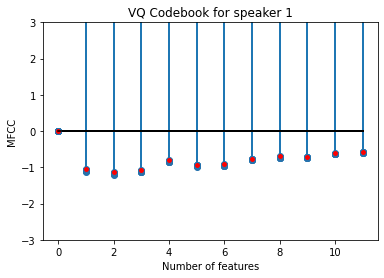

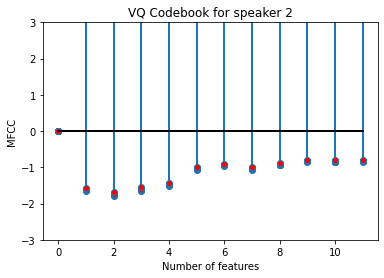

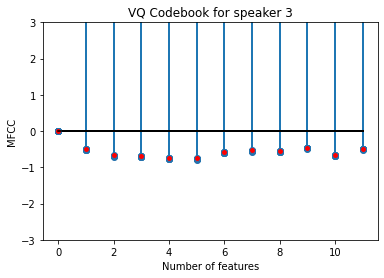

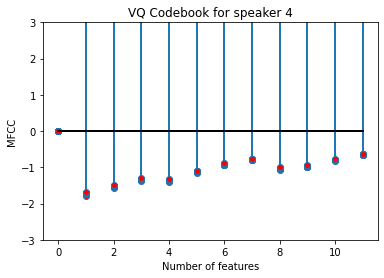

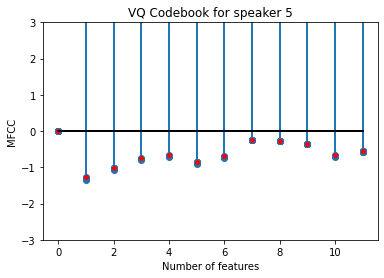

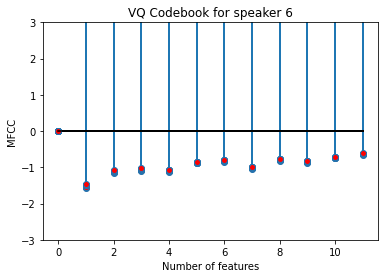

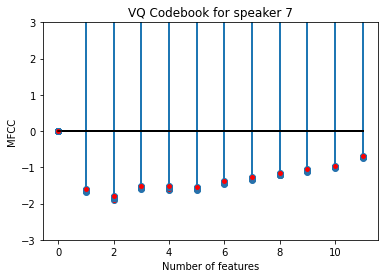

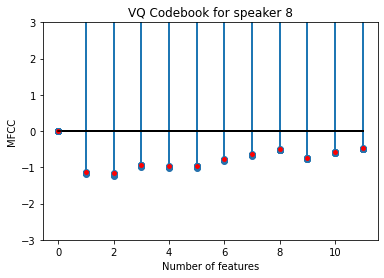

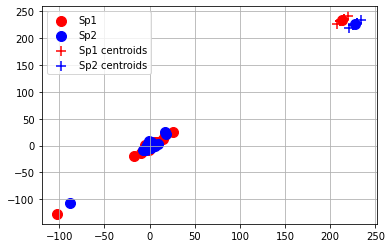

Current test file is  1
MFCC: Speaker  1  matches with speaker  1
Current test file is  2
MFCC: Speaker  2  matches with speaker  3
Current test file is  3
MFCC: Speaker  3  matches with speaker  3
Current test file is  4
MFCC: Speaker  4  matches with speaker  4
Current test file is  5
MFCC: Speaker  5  matches with speaker  5
Current test file is  6
MFCC: Speaker  6  matches with speaker  6
Current test file is  7
MFCC: Speaker  7  matches with speaker  7
Current test file is  8
MFCC: Speaker  8  matches with speaker  8
Accuracy of MFCC is:
=======87.5%=======
Have a great summer! (〜^‿ ^)〜 


In [2]:
import numpy as np
from scipy.io.wavfile import read
from mel_coefficients import mfcc
from train import train, eudistance
from scipy import signal
import os


n_speaker = 8
filterbank = 12
codebooks_mfcc = train(filterbank)
directory = os.path.dirname(os.getcwd()) + '/test'
fname = str()
nCorrect_STFT = 0


def min_distance(features, codebooks):
    speaker = 0
    distmin = np.inf
    for k in range(np.shape(codebooks)[0]):
        D = eudistance(features, codebooks[k, :, :])
        dist = np.sum(np.min(D, axis=1))/(np.shape(D)[0])
        if dist < distmin:
            distmin = dist
            speaker = k
    return speaker

    
def test(n_speaker):
    n_correct_mfcc = 0
    for i in range(n_speaker):
        fname = '/s' + str(i+1) + '.wav'
        print('Current test file is ', str(i+1))
        (fs, s) = read(directory + fname)
        mel_coefs = mfcc(s, fs, filterbank)
        sp_mfcc = min_distance(mel_coefs, codebooks_mfcc)
        print('MFCC: Speaker ', (i + 1), ' matches with speaker ', (sp_mfcc + 1))
        if i == sp_mfcc:
            n_correct_mfcc += 1
    accuracy = (n_correct_mfcc/n_speaker)*100
    return accuracy


"""Feel free to uncomment these sections to see how we
tested some things for the questions and the logic of the project,
mainly wrapping our heads around the STFT aspects and MFCC.
Also feel free to comment out any plots in our main used code/functions attached
if you get sick of seeing them, they are not all necessary but we 
plotted them just to show them on the questions to make it simpler
to understand what is happening/behavior"""

"""
# Here is what we calculated Q4 with, using different values of N

data = np.random.rand(128)
ps = np.abs(np.fft.fft(data)) ** 2
time_step = data / 3
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)
plt.plot(freqs[idx], ps[idx])"""

"""data = np.random.rand(256)
ps = np.abs(np.fft.fft(data)) ** 2
time_step = data / 3
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)
plt.plot(freqs[idx], ps[idx])"""

"""data = np.random.rand(512)
ps = np.abs(np.fft.fft(data)) ** 2
time_step = data / 3
freqs = np.fft.fftfreq(data.size, time_step)
idx = np.argsort(freqs)
plt.plot(freqs[idx], ps[idx])"""

"""
# magnitude of stft to compare to spectrogram
for i in range(0,n_speaker):
    fname = '/s' + str(i+1) + '.wav'
    print('Current training file is ', str(i+1))
    (fs, s) = read(directory + fname)
    shortft = signal.stft(s, fs, signal.hamming(s))
    for n in range(0, len(shortft), 1):
        print(sum((np.sqrt(shortft[n])**2)))
"""
"""
#This is how I viewed the spectrogram. It is third index array of what signal.spectrogram returns,
#could not manage to figure out how to take the average of this frequency due to error
for i in range(0,n_speaker):
    fname = '/s' + str(i+1) + '.wav'
    print('Current training file is ', str(i+1))
    (fs, s) = read(directory + fname)
    shortft = signal.spectrogram(s, fs)
    for n in range(0, len(shortft[2]), 1):
        print(shortft[2])"""
"""
#Fast Fourier Transform calculation for each file
for i in range(0, n_speaker):
    fname = '/s' + str(i+1) + '.wav'
    print('Current training file is ', str(i+1))
    (fs, s) = read(directory + fname)
    ft = fft(s, fs,)
    for n in range(0, len(ft), 50):
         print((ft[n]))"""

# Final test
MFCCACC = test(n_speaker)
print("Accuracy of MFCC is:")
print("=======" + str(MFCCACC) + "%" + "=======")
print("Have a great summer! (〜^‿ ^)〜 ")
